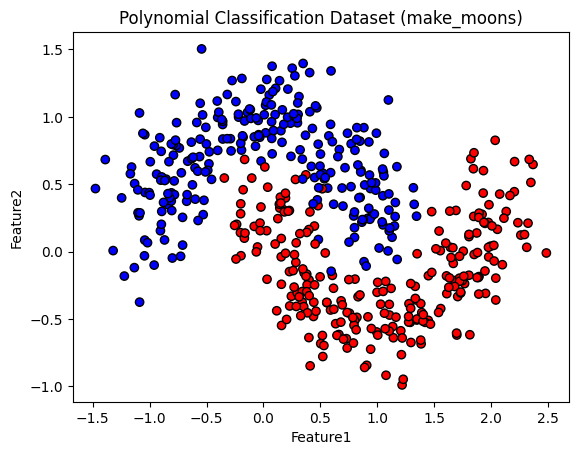

,Feature1,Feature2,Class
0,0.830858,-0.334342,1
1,0.991710,0.879000,0
2,1.107245,-0.470344,1
3,-0.140899,1.033148,0
4,0.405592,1.328529,0
...,...,...,...
495,0.265123,1.023197,0
496,0.193576,-0.011663,1
497,0.345548,-0.128434,1
498,1.403890,-0.466993,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons

# Option 1: Using make_moons (good for non-linear / polynomial classification)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Convert to DataFrame
df = pd.DataFrame({
    'Feature1': X[:, 0],
    'Feature2': X[:, 1],
    'Class': y
})

# Save to CSV
df.to_csv('polynomial_classification_dataset.csv', index=False)

# Quick plot to visualize
plt.scatter(df['Feature1'], df['Feature2'], c=df['Class'], cmap='bwr', edgecolors='k')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Polynomial Classification Dataset (make_moons)')
plt.show()
df

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Split features and target
X = df[['Feature1', 'Feature2']]
y = df['Class']

# 2. Apply polynomial features (degree 2)
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

# 3. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 4. Fit a logistic regression on polynomial features
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.86
